In [43]:
import numpy as np
import tensorflow as tf
from sklearn.datasets import load_sample_image
import matplotlib.pyplot as plt

In [32]:
#load sample images
china = load_sample_image('china.jpg')
flower = load_sample_image('flower.jpg')
dataset = np.array([china,flower], dtype=np.float32)
batch_size, height, width, channels = dataset.shape

In [33]:
#create 2 filters
filters = np.zeros(shape=(7,7, channels,2), dtype=np.float32)
filters[:,3:,0] = 1
filters[3,:,:,1] = 1

In [36]:
X = tf.placeholder(tf.float32,shape=(None,height,width,channels))

In [37]:
convolution=tf.nn.conv2d(X,filters,strides=[1,2,2,1], padding="SAME")

In [38]:
with tf.Session() as sess:
    output = sess.run(convolution,feed_dict={X:dataset})

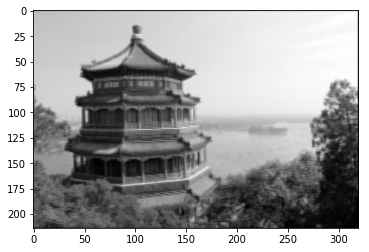

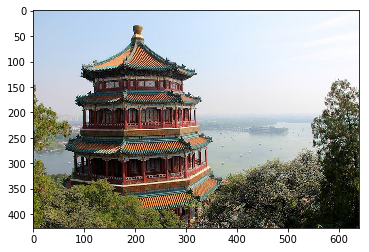

In [55]:
plt.imshow(output[0,:,:,1], cmap="gray")
plt.show()

plt.imshow(china)
plt.show()

In [64]:
# pooling example - reduce the image size 
X_pool = tf.placeholder(tf.float32, shape=(None,height, width, channels))
max_pool = tf.nn.avg_pool(X_pool, ksize=[1,2,2,1],strides=[1,2,2,1],padding='VALID')

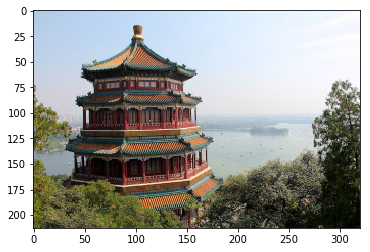

In [65]:
with tf.Session() as sess:
    output_pool = sess.run(max_pool,feed_dict={X_pool:dataset})
    
plt.imshow(output_pool[0].astype(np.uint8))
plt.show()
#notice image size is reduced by factor of 2.